In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-animes-in-mal/mal_anime.csv


In [2]:
import pandas as pd

# Load the data into a DataFrame
anime_df = pd.read_csv('/kaggle/input/all-animes-in-mal/mal_anime.csv')

# Display the first few rows of the DataFrame
anime_df.head()


,Unnamed: 0,title,episodes,status,theme,demographic,genres,type,favorites,popularity,rank,score,members,synopsis,aired,duration,premiered,studios
0,0,Fullmetal Alchemist: Brotherhood,64,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,"218,277",#3,#1,9.10,"3,190,961",After a horrific alchemy experiment goes wrong...,"Apr 5, 2009 to Jul 4, 2010",24 min. per ep.,Spring 2009,Bones
1,1,Steins;Gate,24,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,"183,596",#13,#2,9.07,"2,452,142",Eccentric scientist Rintarou Okabe has a never...,"Apr 6, 2011 to Sep 14, 2011",24 min. per ep.,Spring 2011,White Fox
2,2,Bleach: Sennen Kessen-hen,13,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,"18,421",#458,#3,9.06,"455,428",Substitute Soul Reaper Ichigo Kurosaki spends ...,"Oct 11, 2022 to Dec 27, 2022",24 min. per ep.,Fall 2022,Pierrot
3,3,Gintama°,51,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,"16,042",#332,#4,9.06,"599,235","Gintoki, Shinpachi, and Kagura return as the f...","Apr 8, 2015 to Mar 30, 2016",24 min. per ep.,Spring 2015,Bandai Namco Pictures
4,4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,Finished Airing,School,Seinen,"Comedy,Romance,",TV,"29,397",#193,#5,9.05,"832,346",The elite members of Shuchiin Academy's studen...,"Apr 9, 2022 to Jun 25, 2022",23 min. per ep.,Spring 2022,A-1 Pictures


In [3]:
# Convert popularity and rank to float type to accommodate NaNs
anime_df['rank'] = anime_df['rank'].str.replace('#', '').astype(float)

# Inspect unique values in 'aired' column
anime_df['aired'].unique()[:20]


array(['Apr 5, 2009 to Jul 4, 2010', 'Apr 6, 2011 to Sep 14, 2011',
       'Oct 11, 2022 to Dec 27, 2022', 'Apr 8, 2015 to Mar 30, 2016',
       'Apr 9, 2022 to Jun 25, 2022', 'Apr 29, 2019 to Jul 1, 2019',
       'Mar 4, 2023 to 2023', 'Apr 4, 2011 to Mar 26, 2012',
       'Jan 8, 2021', 'Oct 2, 2011 to Sep 24, 2014',
       'Oct 4, 2012 to Mar 28, 2013', 'Jan 8, 1988 to Mar 17, 1997',
       'Apr 6, 2021 to Jun 29, 2021', 'Jan 9, 2017 to Mar 27, 2017',
       'Jul 8, 2023 to ?', 'Apr 4, 2006 to Mar 25, 2010', 'Sep 17, 2016',
       'Oct 14, 2017 to Mar 31, 2018', 'Oct 3, 2008 to Mar 27, 2009',
       'Apr 6, 2008 to Sep 28, 2008'], dtype=object)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Distribution of Scores')

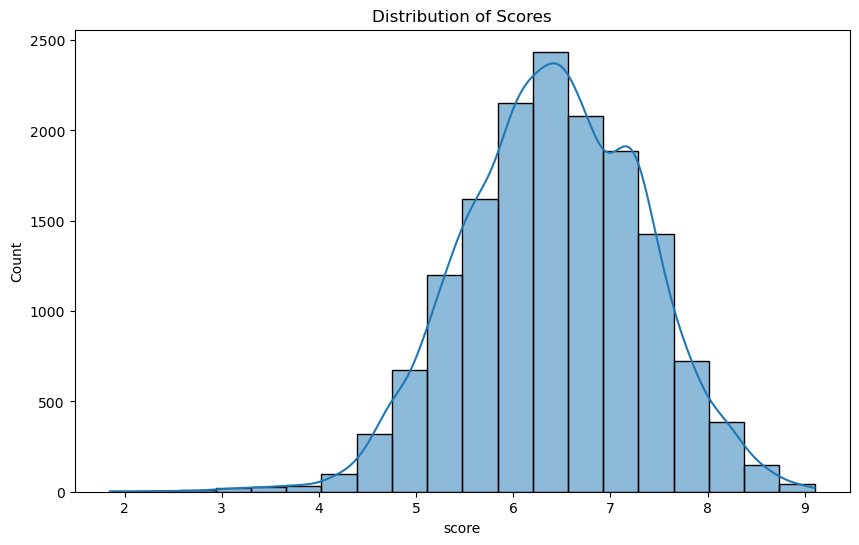

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from collections import Counter




# 1. Distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['score'].dropna(), kde=True, bins=20)
plt.title('Distribution of Scores')




Text(0.5, 1.0, 'Distribution of Number of Episodes (Log Scale)')

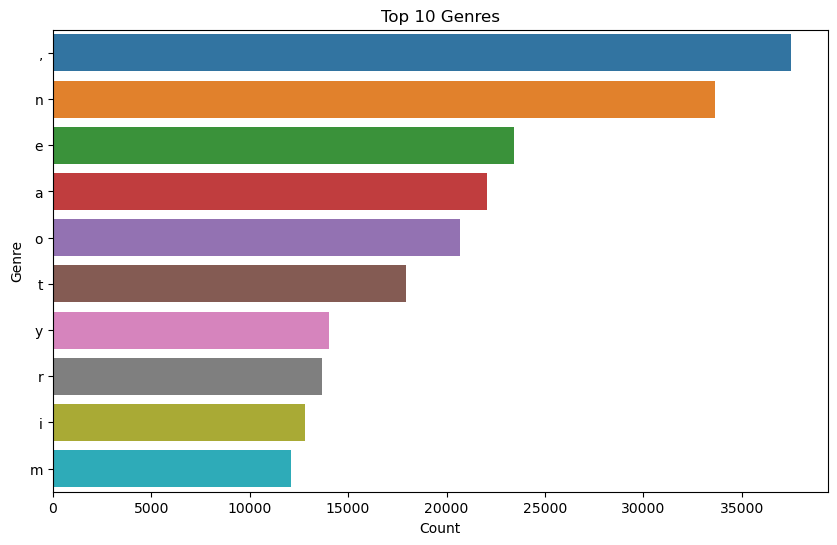

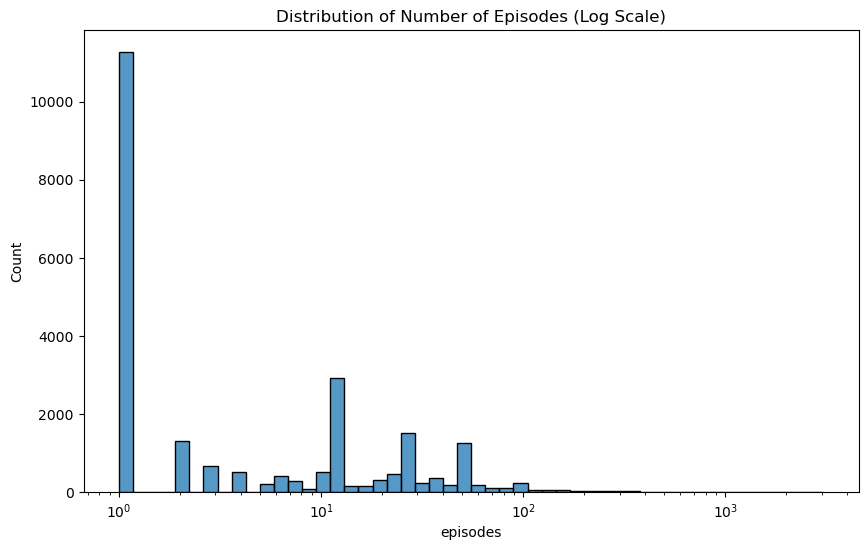

In [5]:
# 2. Top 10 genres
genres = [genre for sublist in anime_df['genres'].dropna() for genre in sublist]
top_genres = Counter(genres).most_common(10)
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genres_df)
plt.title('Top 10 Genres')


# 3. Distribution of number of episodes
anime_df['episodes'] = anime_df['episodes'].replace('Unknown', np.nan).astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['episodes'].dropna(), log_scale=True, bins=50)
plt.title('Distribution of Number of Episodes (Log Scale)')



Text(0.5, 1.0, 'Top 10 Highest Ranked Anime')

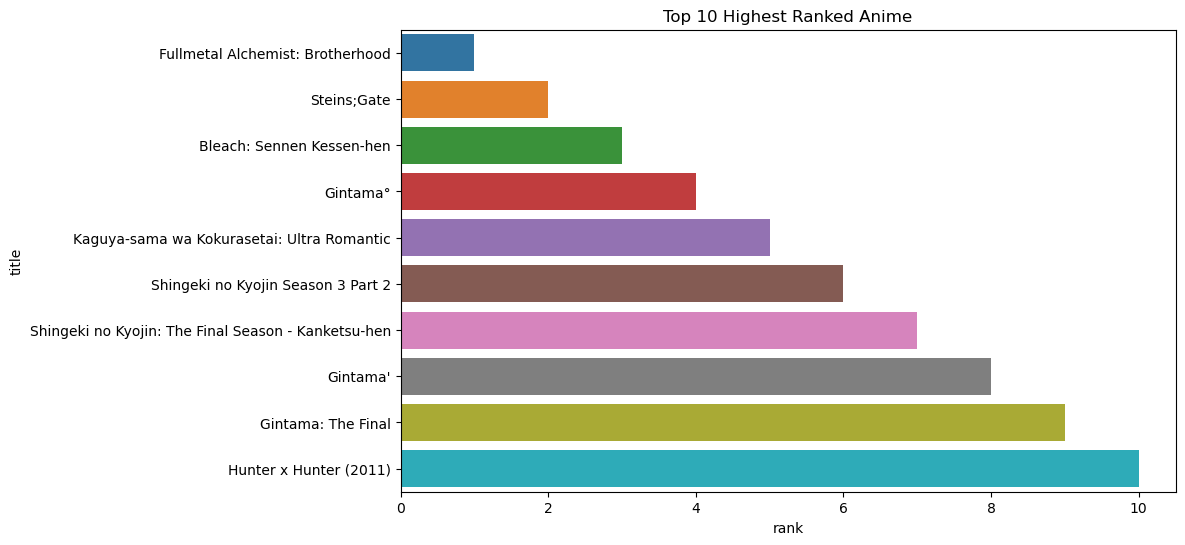

In [6]:

# 6. Top 10 highest ranked anime
top_ranked = anime_df.nsmallest(10, 'rank')[['title', 'rank']]
plt.figure(figsize=(10, 6))
sns.barplot(x='rank', y='title', data=top_ranked)
plt.title('Top 10 Highest Ranked Anime')


Text(0.5, 1.0, 'Distribution of Demographics')

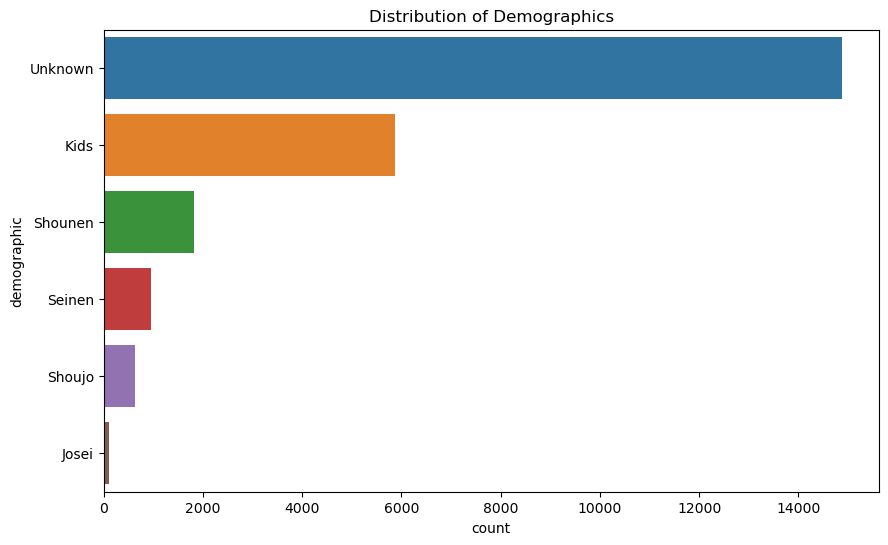

In [7]:
# 7. Distribution of demographics
plt.figure(figsize=(10, 6))
sns.countplot(y='demographic', data=anime_df, order=anime_df['demographic'].value_counts().index)
plt.title('Distribution of Demographics')



Text(0.5, 1.0, 'Top 10 Studios With Most Anime Produced')

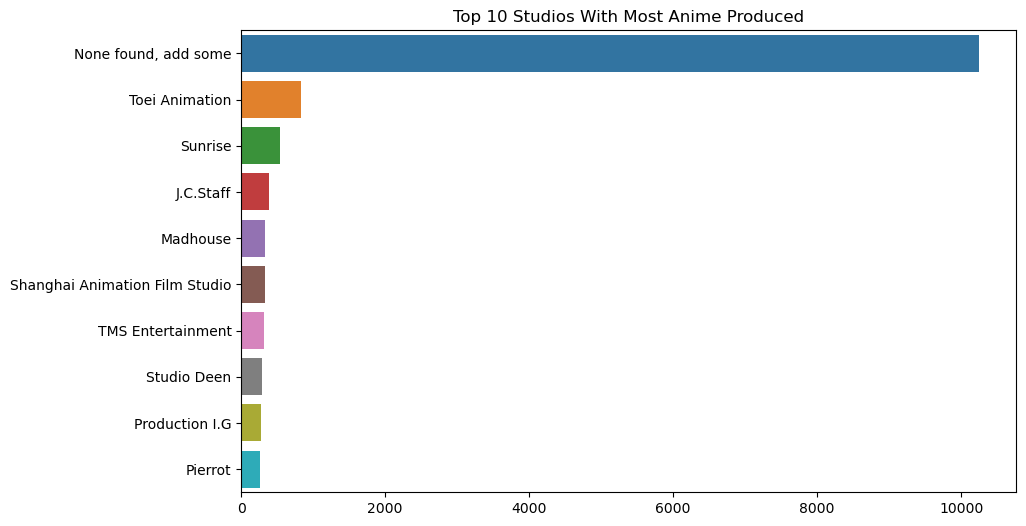

In [8]:
# 8. Top 10 studios with most anime produced
top_studios = anime_df['studios'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_studios.values, y=top_studios.index)
plt.title('Top 10 Studios With Most Anime Produced')


Text(0.5, 1.0, 'Anime Status Distribution')

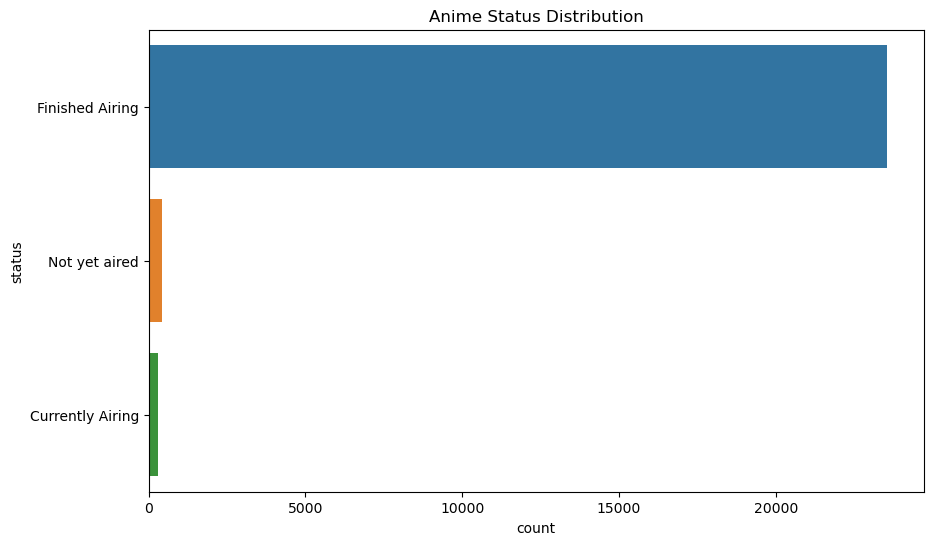

In [9]:
# 10. Anime status distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='status', data=anime_df, order=anime_df['status'].value_counts().index)
plt.title('Anime Status Distribution')


Text(0.5, 1.0, 'Anime Type Distribution')

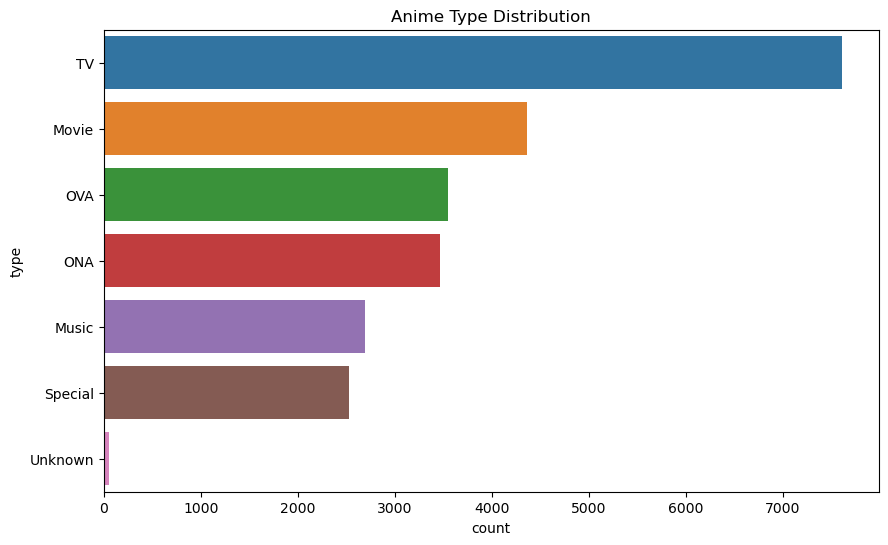

In [10]:
# 11. Anime type distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=anime_df, order=anime_df['type'].value_counts().index)
plt.title('Anime Type Distribution')



Text(0.5, 1.0, 'Relation Between Number of Episodes and Score')

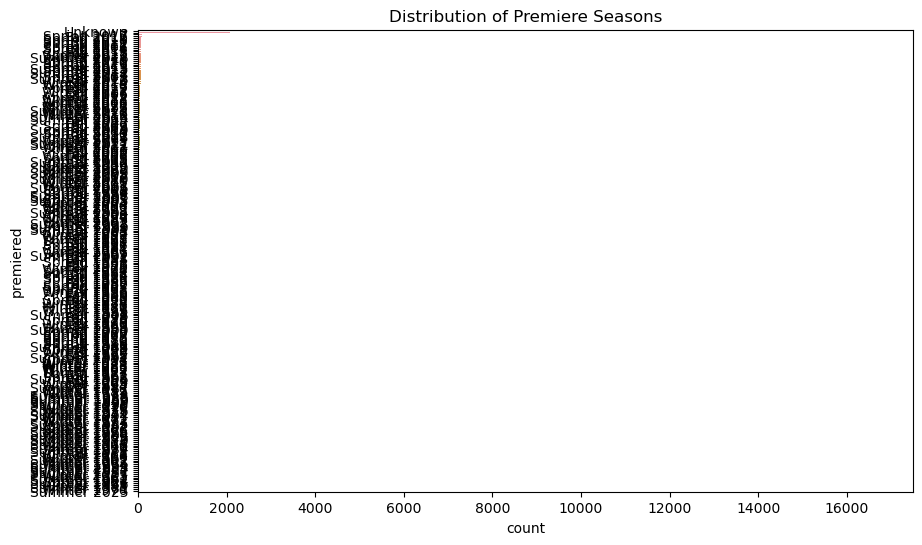

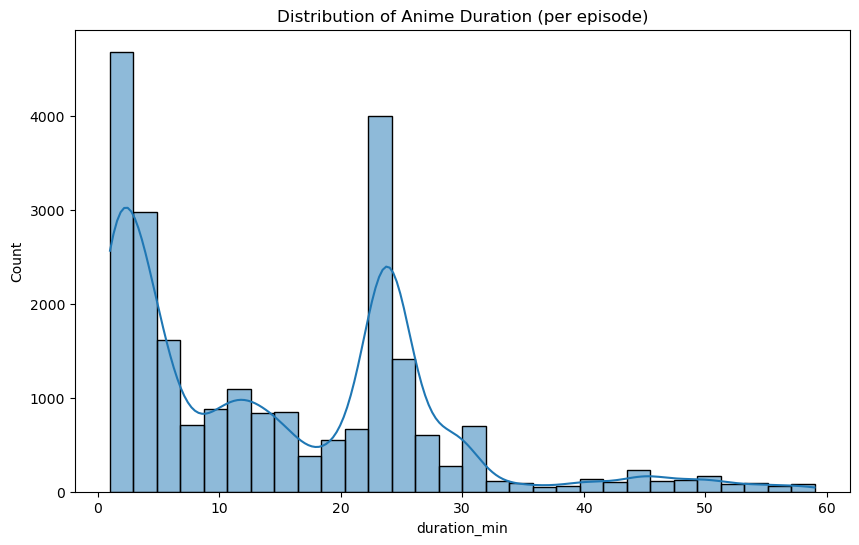

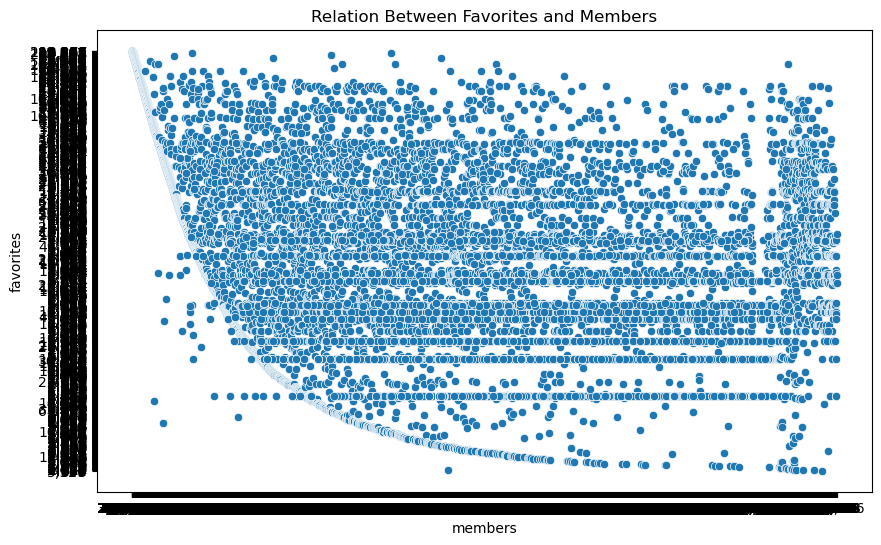

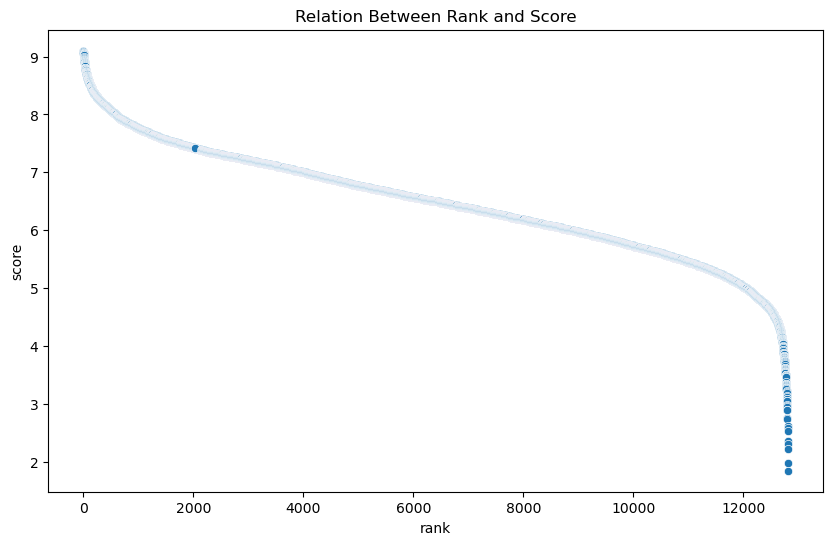

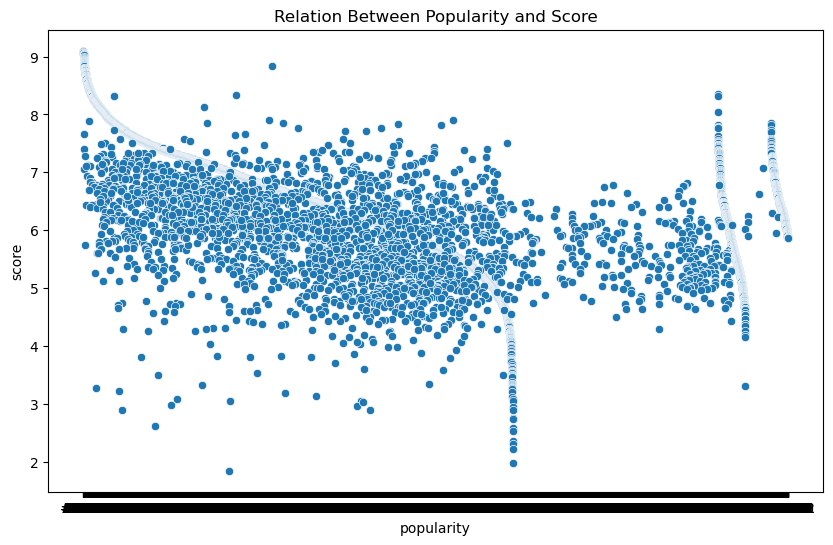

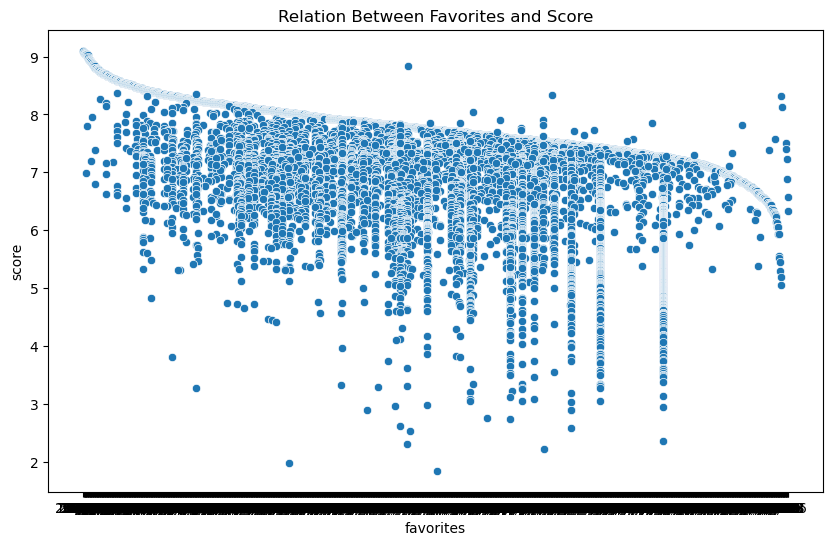

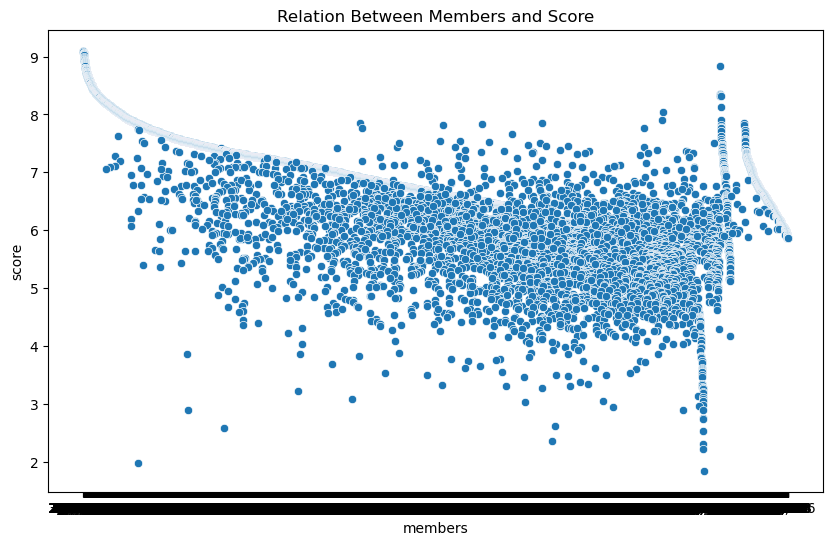

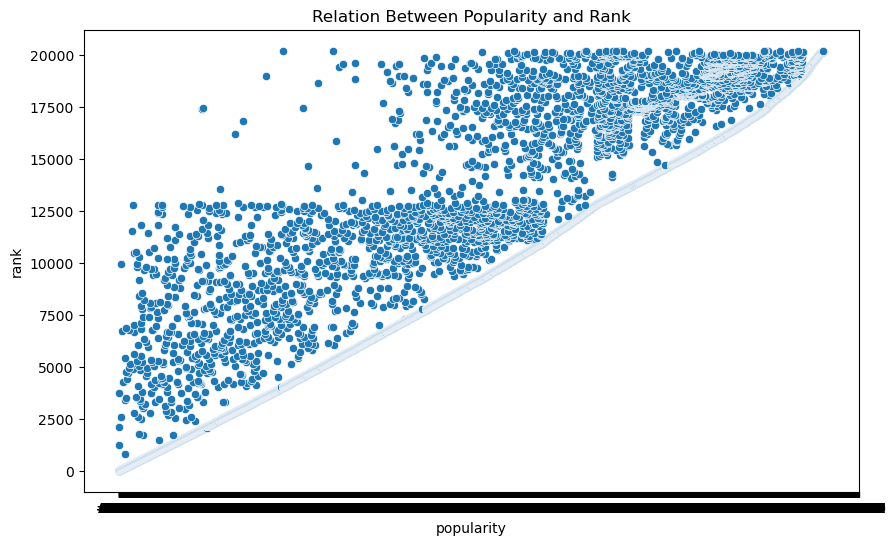

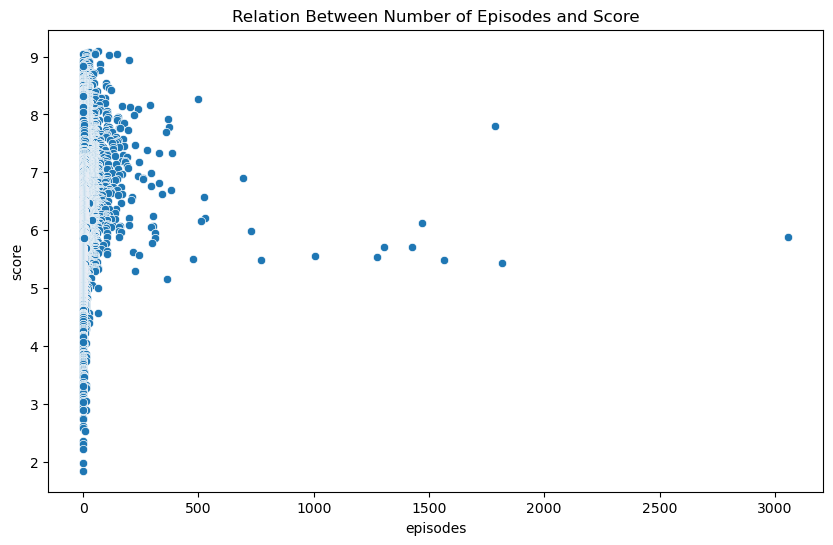

In [11]:

# 12. Distribution of premiere seasons
plt.figure(figsize=(10, 6))
sns.countplot(y='premiered', data=anime_df, order=anime_df['premiered'].value_counts().index)
plt.title('Distribution of Premiere Seasons')


# 13. Distribution of anime duration
anime_df['duration_min'] = anime_df['duration'].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['duration_min'].dropna(), kde=True, bins=30)
plt.title('Distribution of Anime Duration (per episode)')


# 14. Relation between favorites and members
plt.figure(figsize=(10, 6))
sns.scatterplot(x='members', y='favorites', data=anime_df)
plt.title('Relation Between Favorites and Members')


# 15. Relation between rank and score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rank', y='score', data=anime_df)
plt.title('Relation Between Rank and Score')


# 16. Relation between popularity and score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='score', data=anime_df)
plt.title('Relation Between Popularity and Score')


# 17. Relation between favorites and score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='favorites', y='score', data=anime_df)
plt.title('Relation Between Favorites and Score')


# 18. Relation between members and score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='members', y='score', data=anime_df)
plt.title('Relation Between Members and Score')


# 19. Relation between popularity and rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='rank', data=anime_df)
plt.title('Relation Between Popularity and Rank')


# 20. Relation between number of episodes and score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='episodes', y='score', data=anime_df)
plt.title('Relation Between Number of Episodes and Score')
